# **GRAPH THEORY MT-3001**
INSTRUCTOR: DR. NAZISH

ROLL NUMBERS:


1.   K21 3156 SYED ABDUL REHMAN
2.   K21 4612 XABAD NADEEM
3.   K21 3446 YUSRA SOHAIL



# **Shortest and Longest Path Algorithms in a Weighted Graph: Visualization, Efficiency Comparison, and Memory Usage**:

Do you want to add an edge? (yes/no): yes
Enter the starting vertex: A
Enter the ending vertex: B
Enter the weight of the edge: 5
Do you want to add an edge? (yes/no): yes
Enter the starting vertex: A
Enter the ending vertex: C
Enter the weight of the edge: 1
Do you want to add an edge? (yes/no): yes
Enter the starting vertex: B
Enter the ending vertex: D
Enter the weight of the edge: 1
Do you want to add an edge? (yes/no): yes
Enter the starting vertex: B
Enter the ending vertex: E
Enter the weight of the edge: 3
Do you want to add an edge? (yes/no): yes
Enter the starting vertex: C
Enter the ending vertex: F
Enter the weight of the edge: 2
Do you want to add an edge? (yes/no): yes
Enter the starting vertex: C
Enter the ending vertex: G
Enter the weight of the edge: 1
Do you want to add an edge? (yes/no): yes
Enter the starting vertex: D
Enter the ending vertex: H
Enter the weight of the edge: 2
Do you want to add an edge? (yes/no): yes
Enter the starting vertex: E
Enter the ending ve

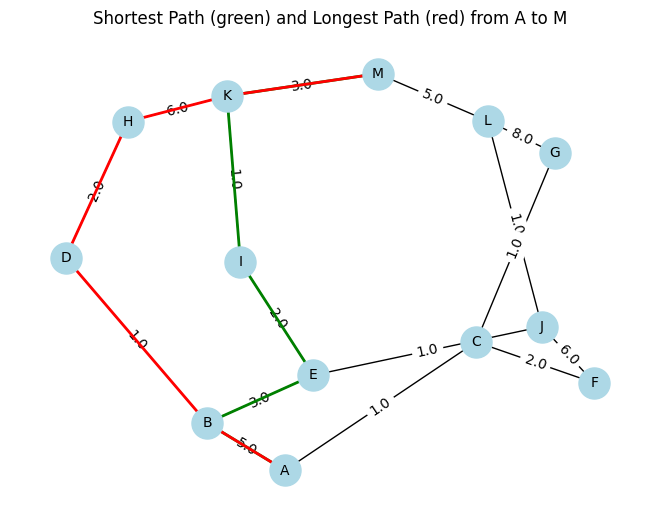

Shortest path from A to M is ['A', 'B', 'E', 'I', 'K', 'M'] with weight 14.0.
Time taken for the shortest path: 3.4809112548828125e-05 seconds
Longest path from A to M is ['A', 'B', 'D', 'H', 'K', 'M'] with weight 17.0.
Time taken for the longest path: 1.5497207641601562e-05 seconds
The longest path approach is more efficient.


In [3]:
import heapq # Importing the heapq module for heap queue algorithm
import networkx as nx ## Importing the NetworkX library for graph visualization
import matplotlib.pyplot as plt # Importing the Matplotlib library for plotting
import time # Importing the time module for measuring execution time
#defining a class to represent our graphs
class graph:
    def __init__(self):
        self.nodes = set()
        self.edges = {}

    def add_edge(self, u, v, weight):
        self.nodes.add(u)
        self.nodes.add(v)
        if u in self.edges:
            self.edges[u].append((v, weight))
        else:
            self.edges[u] = [(v, weight)]
def get_user_input():
    u = input("Enter the starting vertex: ")
    v = input("Enter the ending vertex: ")
    w = float(input("Enter the weight of the edge: "))
    return u, v, w
#find shortest
def shortest(graph, start, end):
	#initialize dist to infinity
    d = {node: float('inf') for node in graph.nodes}
    d[start]=0;#dist to start is 0
    # Priority queue to store (distance, node) pairs
    pq = [(d[start], start)] ## Initialize the priority queue with the start node and its distance
    predecessors = {} ## Dictionary to store predecessors for reconstructing the path
    while pq:
          cd, cn = heapq.heappop(pq) #Get the node with the smallest distance from the priority queue
          if cd > d[cn]:
              continue# Skip this iteration if a shorter path to the current node has already been found

          for n, weight in graph.edges.get(cn, []): # Calculate the potential distance to the neighbor through the current node
              dist = cd + weight
              if dist < d[n]:
                  d[n] = dist # Update the distance if a shorter path is found
                  predecessors[n] = cn # Update the predecessor for reconstructing the path
                  heapq.heappush(pq, (dist, n)) # Add the neighbor to the priority queue with its updated distance
    path=[]
    while end is not None:
          path.append(end) # Add each node to the path
          end = predecessors.get(end) # Move to the predecessor
    path.reverse()# Reverse the path to get the correct order
    return path,d[path[-1]] # Return the shortest path

def longest(graph, start, end):
    # Initialize distances to negative infinity
    d = {node: float('-inf') for node in graph.nodes}# Dictionary to store distances from the start node
    d[start] = 0 # Distance from the start node to itself is zero
    # Priority queue to store (distance, node) pairs
    pq = [(-d[start], start)] # Initialize the priority queue with the start node and its distance (negated)
    predecessors = {} ## Dictionary to store predecessors for reconstructing the path
    while pq:
        cd, cn = heapq.heappop(pq) ## Get the node with the largest distance (negated) from the priority queue
        cd = -cd  # Restore the original distance

        if cd > d[cn]:
            continue# Skip this iteration if a longer path to the current node has already been found


        for n, weight in graph.edges.get(cn, []):
            dist = cd + weight  # Calculate the potential distance to the neighbor through the current node
            if dist > d[n]:
                d[n] = dist  # Update the distance if a longer path is found
                predecessors[n] = cn  # Update the predecessor for reconstructing the path
                heapq.heappush(pq, (-dist, n))  # Add the neighbor to the priority queue with its updated distance (negated)

    # Reconstruct the longest path
    path = []
    while end is not None:
        path.append(end)  # Add each node to the path
        end = predecessors.get(end)  # Move to the predecessor
    path.reverse()  # Reverse the path to get the correct order
    return path,d[path[-1]]   # Return the longest path

if __name__ == "__main__":
    # Create a graph instance
    g = graph()

    while True:
        user_input = input("Do you want to add an edge? (yes/no): ").lower()
        if user_input != 'yes':
            break
        u, v, w = get_user_input()
        g.add_edge(u, v, w)

    sn = input("Enter the starting vertex: ")
    en = input("Enter the ending vertex: ")
    # Measure the time taken by the shortest path
    st_shortest = time.time()
    spr, spw = shortest(g, sn, en)
    et_shortest = time.time()
    # Measure the time taken by the longest path
    st_longest = time.time()
    lpr,lpw = longest(g, sn, en)
    et_longest = time.time()
    #Create a NetworkX graph for visualization
    G = nx.Graph()  # Initialize an empty undirected graph using NetworkX
    # Add nodes to the graph
    for node in g.nodes:
        G.add_node(node)
    # Add edges to the graph along with their weights
    for u in g.edges:
	    for v, weight in g.edges[u]:
	        G.add_edge(u, v, weight=weight)
    # Visualize the graph
    pos = nx.spring_layout(G)  # Compute layout for the graph nodes using the spring layout algorithm
    l = {node: node for node in G.nodes()}  # Create a dictionary of node labels
    edge_l = {(u, v): weight for u, v, weight in G.edges.data('weight')}  # Create a dictionary of edge labels
    # Draw the graph
    nx.draw(G, pos, with_labels=True, labels=l, node_size=500, node_color='lightblue', font_size=10)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_l, font_size=10)  # Draw edge labels
    # Visualize the shortest path
    sp_edges = [(spr[i], spr[i + 1]) for i in range(len(spr)-1)]
    nx.draw_networkx_edges(G, pos, edgelist=sp_edges, edge_color='green', width=2)  # Draw edges for the shortest path
    # Visualize the longest path
    # Visualize the longest path
    lp_edges = [(lpr[i], lpr[i + 1]) for i in range(len(lpr)-1)]
    nx.draw_networkx_edges(G, pos, edgelist=lp_edges, edge_color='red', width=2)  # Draw edges for the longest path

    plt.title(f"Shortest Path (green) and Longest Path (red) from {sn} to {en}")  # Set the plot title
    plt.show()  # Display the graph visualization

    # Compare efficiency and print results
    if spr != float('inf'):
        print(f"Shortest path from {sn} to {en} is {spr} with weight {spw}.")
        print(f"Time taken for the shortest path: {et_shortest - st_shortest} seconds")
    else:
        print(f"There is no path from {sn} to {en} in the shortest path approach.")

    if lpr != float('-inf'):
        print(f"Longest path from {sn} to {en} is {lpr} with weight {lpw}.")
        print(f"Time taken for the longest path: {et_longest - st_longest} seconds")
    else:
        print(f"There is no path from {sn} to {en} in the longest path approach.")
    # Compare and print which one is more efficient
    if (et_shortest - st_shortest) < (et_longest - st_longest):
          print("The shortest path approach is more efficient.")
    else:
          print("The longest path approach is more efficient.")


